In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix, auc

In [66]:
data = pd.read_excel('BigCitiesHealth.xlsx')

In [67]:
data.tail()

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148291,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Long Beach,CA,"Long Beach, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN


### Data Visualisation

In [127]:
data.nunique()

metric_item_label                     99
metric_cat_label                      11
metric_subcat_label                   31
metric_item_label_subtitle            99
metric_cat_item_yaxis_label           15
metric_source_desc_label_fn           11
metric_source_desc_label_url_fn       11
geo_label_city                        36
geo_label_state                       23
geo_label_citystate                   36
geo_fips_code                         35
value                              95470
date_label                            11
geo_label_proxy_or_real                2
geo_label_proxy_footnote               3
geo_fips_desc                          3
date_label_proxy_or_real               2
date_label_proxy_footnote              3
value_ci_flag_yesno                    2
value_95_ci_low                    85213
value_95_ci_high                   85458
value_90_ci_low                        0
value_90_ci_high                       0
geo_strata_region                      4
geo_strata_pover

Text(0, 0.5, 'Counts')

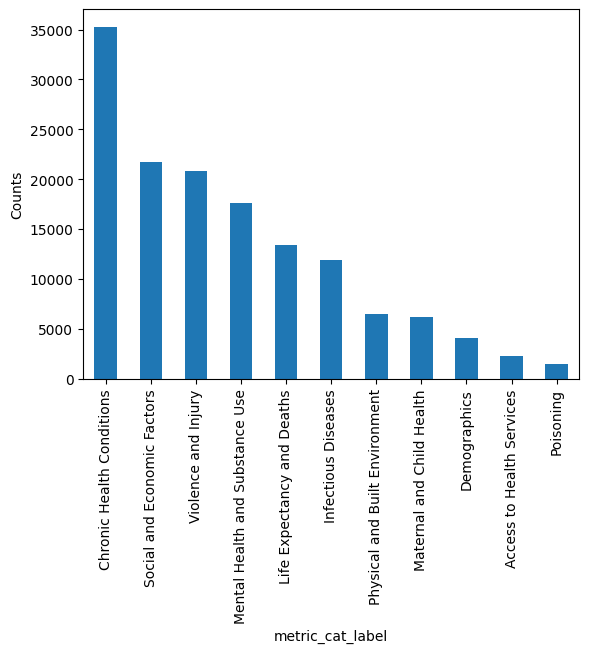

In [108]:
cat_counts = data['metric_cat_label'].value_counts()
cat_counts.plot.bar()
plt.ylabel('Counts')


Text(0.5, 0, 'Counts')

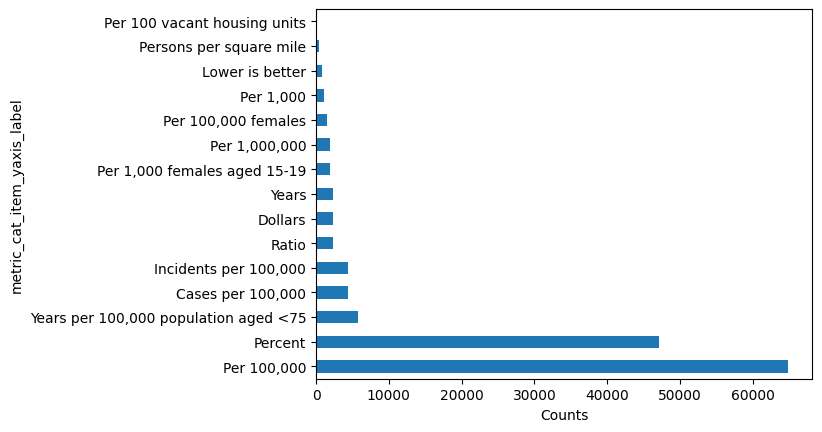

In [120]:
cat2_counts = data['metric_cat_item_yaxis_label'].value_counts()
axis = cat2_counts.plot.barh()
axis.set_xlabel('Counts')


Text(0, 0.5, 'Counts')

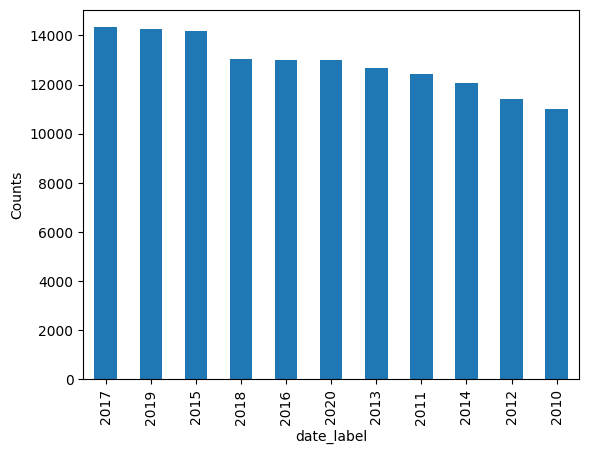

In [131]:
data['date_label'] = data['date_label'].astype(int)
date_counts = data['date_label'].value_counts()
date_counts.plot.bar()
plt.ylabel('Counts')

### Looking for Missing Values and Outliers
The numerical columns in our data are: 'value_95_ci_low' and 'value_95_ci_high'

In [69]:
#Find NaNs in 'value_95_ci_low'
nan_low = data['value_95_ci_low'].isna().value_counts()

#Find NaNs in 'value_95_ci_low'
nan_high = data['value_95_ci_high'].isna().value_counts()

nan_low, nan_high

(value_95_ci_low
 False    100302
 True      47990
 Name: count, dtype: int64,
 value_95_ci_high
 False    93388
 True     54904
 Name: count, dtype: int64)

Text(0.5, 1.0, 'Percentage of Missing Values in "value_95_ci_high"')

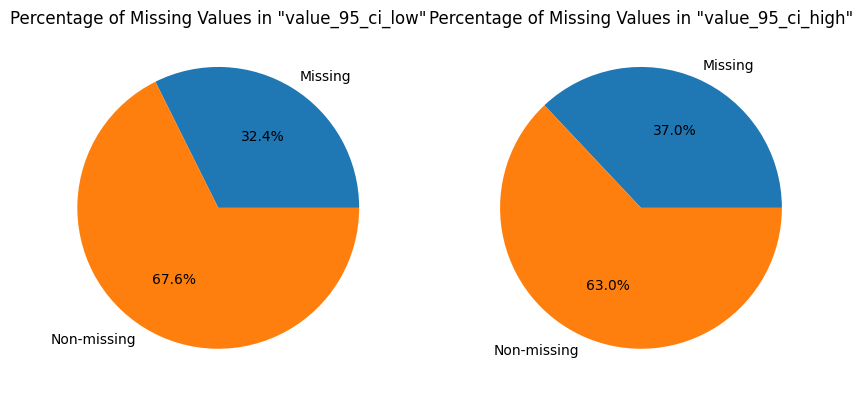

In [70]:


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the pie chart for 'value_95_ci_low'
labels = ['Missing', 'Non-missing']
sizes = [nan_low[True], nan_low[False]]
axs[0].pie(sizes, labels=labels, autopct='%1.1f%%')
axs[0].set_title('Percentage of Missing Values in "value_95_ci_low"')

# Plot the pie chart for 'value_95_ci_high'
labels = ['Missing', 'Non-missing']
sizes = [nan_high[True], nan_high[False]]
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%')
axs[1].set_title('Percentage of Missing Values in "value_95_ci_high"')



In [72]:
#Drop all no containing 
data = data[~data['value_95_ci_low'].isin(['no'])]
data = data[~data['value_95_ci_high'].isin(['no'])]

In [73]:
#Change from object to float
data['value_95_ci_low'] = data['value_95_ci_low'].astype('float64')
data.dtypes

metric_item_label                   object
metric_cat_label                    object
metric_subcat_label                 object
metric_item_label_subtitle          object
metric_cat_item_yaxis_label         object
metric_source_desc_label_fn         object
metric_source_desc_label_url_fn     object
geo_label_city                      object
geo_label_state                     object
geo_label_citystate                 object
geo_fips_code                       object
value                              float64
date_label                         float64
geo_label_proxy_or_real             object
geo_label_proxy_footnote            object
geo_fips_desc                       object
date_label_proxy_or_real            object
date_label_proxy_footnote           object
value_ci_flag_yesno                 object
value_95_ci_low                    float64
value_95_ci_high                   float64
value_90_ci_low                    float64
value_90_ci_high                   float64
geo_strata_

In [74]:
data.describe()

,value,date_label,value_95_ci_low,value_95_ci_high,value_90_ci_low,value_90_ci_high
count,140598.000000,141368.000000,93378.000000,93388.000000,0.0,0.0
mean,869.845395,2015.186110,468.838106,568.740516,NaN,NaN
std,4405.061284,3.118971,1742.895189,2043.575501,NaN,NaN
min,-1.052184,2010.000000,-148.037039,0.458320,NaN,NaN
25%,10.998028,2013.000000,9.337966,15.449973,NaN,NaN
50%,26.700000,2015.000000,23.259248,34.061614,NaN,NaN
75%,81.168785,2018.000000,109.929802,149.434371,NaN,NaN
max,99408.000000,2020.000000,22650.600880,29193.761110,NaN,NaN


In [75]:
params_labels = {   'value' : 'Value', 
                    'value_95_ci_low': 'Value 95 Low', 
                    'value_95_ci_high': 'Value 95 High',
}

In [82]:
new_data = data.loc[:, ['value_95_ci_low', 'value_95_ci_high', 'value']].copy()
new_data

,value_95_ci_low,value_95_ci_high,value
0,240.233095,307.293299,271.876868
1,161.906352,629.881493,333.954685
2,73.839052,98.550579,85.391551
3,328.986597,382.175123,354.585206
4,104.928717,316.971329,187.017704
...,...,...,...
148287,5668.487295,5903.948459,5786.217877
148288,6458.346917,7717.512570,7087.929743
148289,3723.288703,4475.407910,4099.348306
148290,4594.357077,6818.700061,5706.528569


In [83]:
def parameters_boxplot(data: pd.DataFrame, parameters:params_labels):

    # Customize the colors of the boxes and whiskers
    color = {"boxes": "Black", "whiskers": "DarkBlue", "medians": "DarkOrange"}

    # Determine the number of rows and columns based on the number of parameters
    n_params = len(parameters)
    rows = (n_params + 1) // 2
    cols = min(n_params, 2)

    # Create a figure with the appropriate number of rows and columns
    fig, axes = plt.subplots(rows, cols, figsize=(14, 14))

    # Iterate over each parameter
    for i, (param, label) in enumerate(parameters.items()):
        
        # Determine the row and column index for the current parameter
        row = i // cols
        col = i % cols
        
        # Select the axis to plot the parameter
        ax = axes[row, col] if rows > 1 else axes[col]

        # Create the box plot for the current parameter
        data[[param]].plot.box(ax=ax, color=color, sym="r.").set(title=f'{label} box plot', ylabel='Value')

    # Return the created figure
    return fig

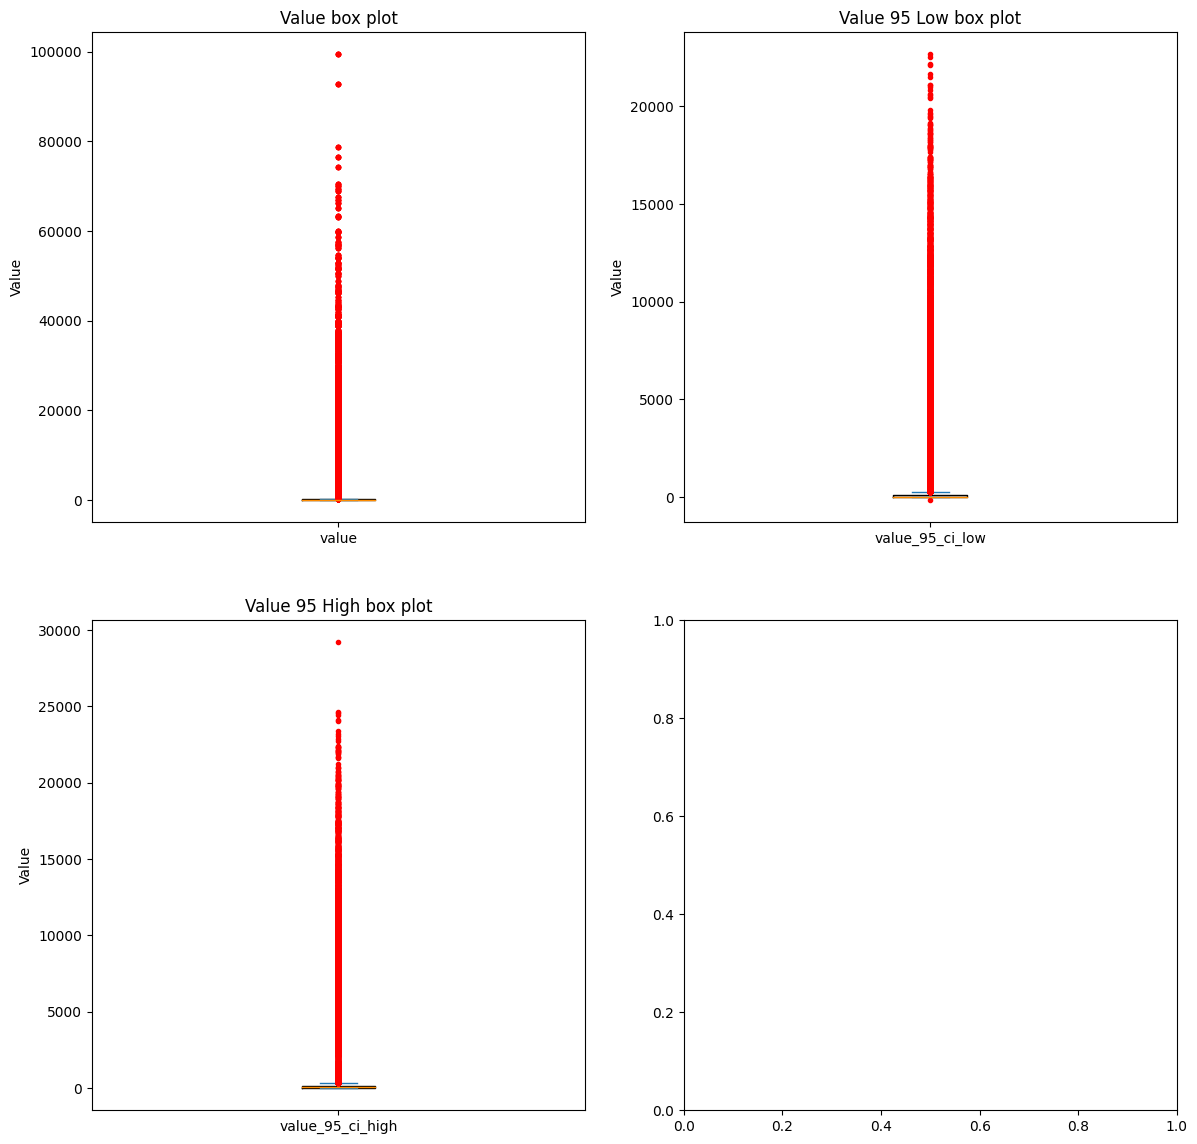

In [84]:
fig_params = parameters_boxplot(new_data, parameters = params_labels )


In [85]:
#Potential outliers
new_data = data.drop(['date_label'], axis=1)


new_data = new_data.loc[new_data['value_95_ci_high'] < 55]
new_data = new_data.loc[new_data['value_95_ci_low'] < 40]
new_data = new_data.loc[new_data['value'] < 60]

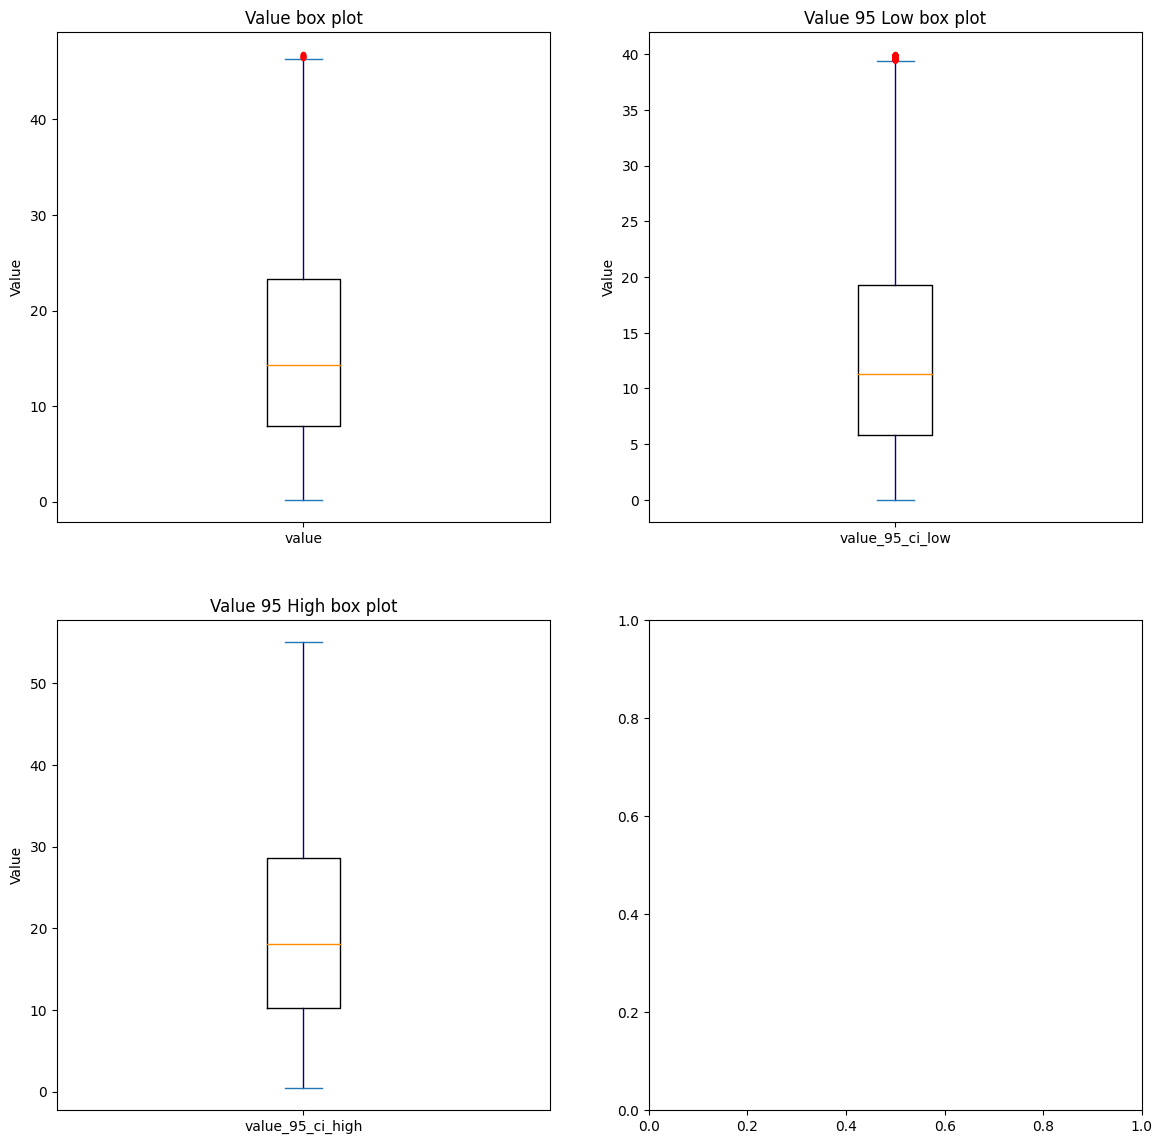

In [86]:
fig_params = parameters_boxplot(new_data, parameters = params_labels )


<Axes: >

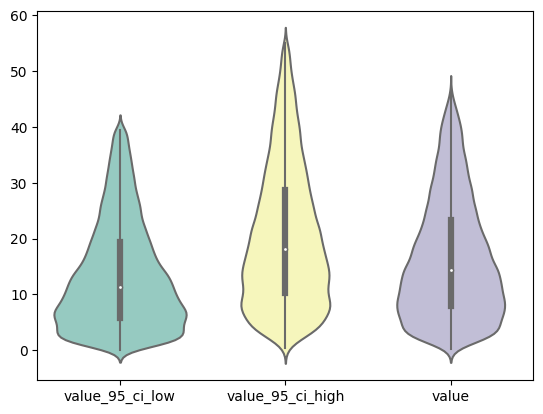

In [91]:
sns.violinplot(data=new_data[['value_95_ci_low', 'value_95_ci_high', 'value']], palette='Set3')
plt.xlabel('Column Names')
plt.ylabel('')